In [2]:
import sys
sys.path.append('..')  # allow this notebook to find equal-level directories
from importing_modules import *
# pyomo.environ as oe, seaborn as sns, plotly.plotly as py, plotly.graph_objs as go
# from util.gjh_wrapper import gjh_solve, make_df, from vis import acres_bars, zL_bars
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Danny/anaconda3/envs/OptSubProblem/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy



In [3]:
from sys import path as pylib #im naming it as pylib so that we won't get confused between os.path and sys.path 
# pylib += [os.path.abspath(os.path.join(ROOT_DIR, '../castjeeves'))]
pylib.append(os.path.abspath('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/CastJeeves'))
# print(pylib)
from CastJeeves.jeeves import Jeeves

In [4]:
cj = Jeeves()
# print(cj.geo.all_geotypes())

## Create problem instance

In [3]:

# Load data for each set, parameter, etc. to define a problem instance
objwrapper = LoadObj()
data = objwrapper.load_data(savedata2file=False)

# Set the cost bound ----
data.totalcostupperbound = 100000
costboundstr = str(round(data.totalcostupperbound, 1))

# Create concrete problem instance using the separately defined optimization model
mdl = objwrapper.create_concrete(data=data)

# Retain only the Nitrogen load objective, and deactivate the others
mdl.PercentReduction['P'].deactivate()
mdl.PercentReduction['S'].deactivate()

# ---- Solver name ----
localsolver = True
solvername = 'ipopt'
# solvername = 'minos'

In [6]:
# data.phi

## Solve problem instance

In [9]:
myobj = SolveAndParse(instance=mdl, data=data, localsolver=localsolver, solvername=solvername)
merged_df = myobj.solve()
print('\nObjective is: %d' % oe.value(mdl.PercentReduction['N']))


Solver log file: 'logfile_loadobjective.log'
Solver solution file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpie5asr5u.pyomo.sol'
Solver problem files: ('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpie5asr5u.pyomo.nl',)
Ipopt 3.12.8: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt document

In [10]:
temp_df = pd.DataFrame([[k.index(), mdl.dual[k]]
                            for k in mdl.dual.keys()],
                           columns=['key', 'value'])
# temp_df.dropna(inplace=True)
display(temp_df.tail(5))
print(temp_df.shape[0])

[mdl.BMPS[temp_df.key[x][0]] for x in range(1,temp_df.shape[0])]
# mdl.BMPS[temp_df.key[x][0] for x in temp_df.shape[0]]

,key,value
1103,"(115, N51133RL0_6450_0000, soy)",1.510736e-12
1104,"(115, N51133RL0_6450_0000, swm)",5.748889e-10
1105,"(115, N51133RL0_6450_0000, wat)",1.753441e-12
1106,"(115, N51133RL0_6450_0000, wfp)",3.072721e-12
1107,"(115, N51133RL0_6450_0000, wto)",3.044986e-12


1108


['AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',


In [11]:
# from util.solution_wrangler import get_dual_df
# dual_df = get_dual_df(mdl)
# display(dual_df.tail(5))

In [12]:
# display(dual_df.loc[dual_df.bmpshortname == 'HRTill'])
# display(dual_df.tail(20))

In [13]:
# tempdf_withduals = merged_df.merge(dual_df, how='left',
#                                    on=['bmpshortname', 'landriversegment', 'loadsource'])
# display(tempdf_withduals.head(30))

## Visualize

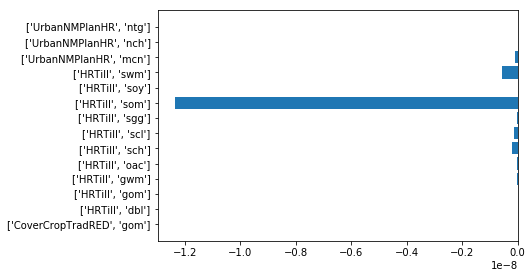

In [14]:
# ---- Make zL Figure ----
# zL_df_filtered = merged_df.loc[abs(merged_df['zL'])>0.45,:].copy()
keystrs = [str([x, y]) for x, y in zip(merged_df['bmpshortname'], merged_df['loadsource'])]
# Make Figure
fig = plt.figure(figsize=(10, 4))
rects = plt.barh(y=keystrs, width=merged_df['zL'])
ax = plt.gca()

ax.set_position([0.3,0.1,0.5,0.8])


filenamestr = ''.join(['output/loadobj_zL_costbound', costboundstr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'),
                       '.png'])
plt.savefig(os.path.join(projectpath, filenamestr))

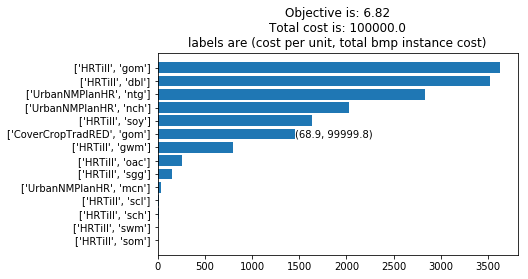

In [15]:
# ---- Acres Figure ----
sorteddf_byacres = merged_df.sort_values(by='acres')

filenamestr = ''.join(['output/loadobj_x_costbound', costboundstr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'), '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)

objstr = ''.join(['Objective is: ', str(round(oe.value(mdl.PercentReduction['N']),2))])
coststr = ''.join(['Total cost is: ', str(round(oe.value(mdl.Total_Cost.body),1))])
titlestr = '\n'.join([objstr, coststr, 'labels are (cost per unit, total bmp instance cost)'])

acres_bars(df=sorteddf_byacres, instance=mdl, titlestr=titlestr,
           savefig=True, savefilepathandname=savefilepathandname)

## Gradient, Jacobian, Hessian

In [16]:
gjh_filename, g = gjh_solve(instance=mdl,
                            keepfiles=True,
                            amplenv=ampl,
                            basegjhpath=os.getcwd())

g_df = make_df(instance=mdl, filterbydf=merged_df, g=g)

g_df = sorteddf_byacres.merge(g_df, how='left',
                              on=['bmpshortname', 'landriversegment', 'loadsource'],
                              sort=False)

Solver log file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpsjd509t7_gjh.log'
Solver solution file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpdlclwm9w.pyomo.sol'
Solver problem files: ('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpdlclwm9w.pyomo.nl',)
Variable component object x


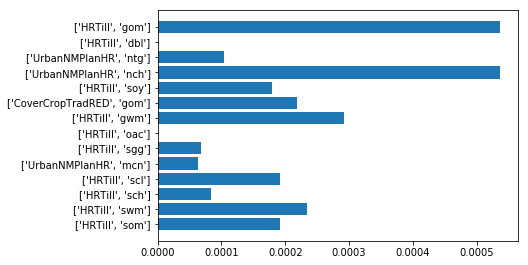

In [17]:
# ---- Make gradient Figure ----
# g_df_filtered = g_df.loc[abs(g_df['g'])>0.001,:].copy()
g_df_filtered = g_df
# sorteddf = g_df_filtered.sort_values(by='g')
# sorteddf_byacres

# sorteddf_byacres
# g_df = g_df.merge(sorteddf_byacres, how='right',
#                on=['bmpshortname', 'landriversegment', 'loadsource'])

keystrs = [str([x, y]) for x, y in zip(g_df_filtered['bmpshortname'], g_df_filtered['loadsource'])]
# Make Figure
fig = plt.figure(figsize=(10, 4))
rects = plt.barh(y=keystrs, width=g_df_filtered['g'])
ax = plt.gca()

ax.set_position([0.3,0.1,0.5,0.8])


filenamestr = ''.join(['output/loadobj_g_costbound', costboundstr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'),
                       '.png'])
plt.savefig(os.path.join(projectpath, filenamestr))

## Use the IPOPT derivative test

In [18]:
solver = SolverFactory(solvername)

# Using the 'ipopt.opt' options file if in this same directory

mdl.jac_g = oe.Suffix(direction=oe.Suffix.IMPORT)
mdl.grad_f = oe.Suffix(direction=oe.Suffix.IMPORT)

results = solver.solve(mdl, tee=True, symbolic_solver_labels=True, keepfiles=True,
                       logfile='logfile_loadobjective_derivativetest.log')

Solver log file: 'logfile_loadobjective_derivativetest.log'
Solver solution file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpxqvzzej2.pyomo.sol'
Solver problem files: ('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpxqvzzej2.pyomo.nl',)
Ipopt 3.12.8: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see

In [19]:
mdl.grad_f.pprint()

grad_f : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key : Value


In [20]:
mdl.x.pprint()

x : Size=7626, Index=x_index
    Key                                                       : Lower : Value                  : Upper : Fixed : Stale : Domain
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'aop') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'cch') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'cci') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'ccn') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'cfr') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'cir') :     0 :                   None :  None : False :  True : NonNegativeReals
               

       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'ccn') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'cfr') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'cir') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'cmo') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'cnr') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'ctg') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'dbl') :     0 :  2.573008860376958e-06 :  None : False : False : NonNegativeReals
       ('CoverCropTradNutOHND', 'N

          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'mci') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'mcn') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'mir') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'mnr') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'mtg') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'nch') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'nci') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N

           ('CoverCropTradTND', 'N51133RL0_6450_0000', 'gom') :     0 :   6.53032841217009e-06 :  None : False : False : NonNegativeReals
           ('CoverCropTradTND', 'N51133RL0_6450_0000', 'gwm') :     0 : 2.0379214779951065e-06 :  None : False : False : NonNegativeReals
           ('CoverCropTradTND', 'N51133RL0_6450_0000', 'hfr') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTND', 'N51133RL0_6450_0000', 'lhy') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTND', 'N51133RL0_6450_0000', 'mch') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTND', 'N51133RL0_6450_0000', 'mci') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTND', 'N51133RL0_6450_0000', 'mcn') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTND', 'N

                 ('OSWnoFence', 'N51133RL0_6450_0000', 'cci') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('OSWnoFence', 'N51133RL0_6450_0000', 'ccn') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('OSWnoFence', 'N51133RL0_6450_0000', 'cfr') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('OSWnoFence', 'N51133RL0_6450_0000', 'cir') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('OSWnoFence', 'N51133RL0_6450_0000', 'cmo') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('OSWnoFence', 'N51133RL0_6450_0000', 'cnr') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('OSWnoFence', 'N51133RL0_6450_0000', 'ctg') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('OSWnoFence', 'N

                ('UrbFilterST', 'N51133RL0_6450_0000', 'cmo') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterST', 'N51133RL0_6450_0000', 'cnr') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterST', 'N51133RL0_6450_0000', 'ctg') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterST', 'N51133RL0_6450_0000', 'dbl') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterST', 'N51133RL0_6450_0000', 'fnp') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterST', 'N51133RL0_6450_0000', 'for') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterST', 'N51133RL0_6450_0000', 'fsp') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterST', 'N